In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import re
import pandas as pd
import numpy as np

In [2]:
# analyze the duty cycle when have a 60s per packet traffic 
# you will see the high idle cycle take place when using high bitrate
speed = ['1000kbps','250kbps','50kbps']
cata = ['tx_bc','tx_uc','rx_bc','rx_uc','rx_idle']
result = {
    '1000kbps':{},
    '250kbps':{},
    '50kbps':{}
}
for s in speed:
    for key in cata:
        result[s][key] = 0

In [20]:
for s in speed:
    file_name = '{}.txt'.format(s)
    with open('./examples/mesh/results/duty cycle analysis/{}'.format(file_name),'r') as f:
        text = f.read()
        result[s]['tx_bc'] = float(re.findall('duty_cycle_rx_bc=.+, duty_cycle_tx_bc=(.+),duty_cycle_rx_uc=.+,duty_cycle_tx_uc=.+,duty_cycle_rx_idle=.+',text)[0])
        result[s]['rx_bc'] = float(re.findall('duty_cycle_rx_bc=(.+), duty_cycle_tx_bc=.+,duty_cycle_rx_uc=.+,duty_cycle_tx_uc=.+,duty_cycle_rx_idle=.+',text)[0])
        result[s]['tx_uc'] = float(re.findall('duty_cycle_rx_bc=.+, duty_cycle_tx_bc=.+,duty_cycle_rx_uc=.+,duty_cycle_tx_uc=(.+),duty_cycle_rx_idle=.+',text)[0])
        result[s]['rx_uc'] = float(re.findall('duty_cycle_rx_bc=.+, duty_cycle_tx_bc=.+,duty_cycle_rx_uc=(.+),duty_cycle_tx_uc=.+,duty_cycle_rx_idle=.+',text)[0])
        result[s]['rx_idle'] = float(re.findall('duty_cycle_rx_bc=.+, duty_cycle_tx_bc=.+,duty_cycle_rx_uc=.+,duty_cycle_tx_uc=.+,duty_cycle_rx_idle=(.+)',text)[0])
                    

In [21]:
result

{'1000kbps': {'tx_bc': 0.0002662037226291274,
  'tx_uc': 0.0032584817131392,
  'rx_bc': 0.0002662037226291274,
  'rx_uc': 0.005115389252561146,
  'rx_idle': 3.5604128457157302},
 '250kbps': {'tx_bc': 0.0010462229964429135,
  'tx_uc': 0.010871563600675493,
  'rx_bc': 0.0010462229964429135,
  'rx_uc': 0.012779750197947345,
  'rx_idle': 1.989607120487225},
 '50kbps': {'tx_bc': 0.005475570522124213,
  'tx_uc': 0.05036161913665869,
  'rx_bc': 0.005475570522124213,
  'rx_uc': 0.05202440145937762,
  'rx_idle': 0.9111761016606582}}

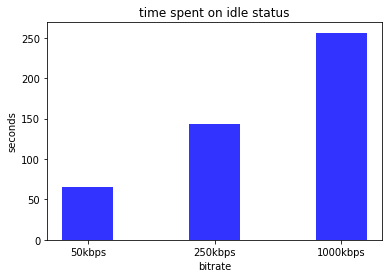

In [38]:
x = range(1,4)
plt.bar(x=x, height=[result['50kbps']['rx_idle']/100*7200,result['250kbps']['rx_idle']/100*7200,result['1000kbps']['rx_idle']/100*7200],
        width=0.4, alpha=0.8, color='blue', label="rx_idle",tick_label=['50kbps','250kbps','1000kbps'])
plt.xlabel('bitrate')
plt.ylabel('seconds')
plt.title('time spent on idle status')
'''plt.bar(x=[i + 0.2 for i in x], height=[result['50kbps']['rx_bc']/100*7200+result['50kbps']['rx_uc']/100*7200,
                           result['50kbps']['rx_bc']/100*7200+result['50kbps']['rx_uc']/100*7200,
                           result['50kbps']['rx_bc']/100*7200+result['50kbps']['rx_uc']/100*7200,],
        width=0.2, alpha=0.8, color='blue', label="rx",tick_label=['50kbps','250kbps','1000kbps'])
'''
'''plt.bar(x=[i + 0.4 for i in x], height=[result['50kbps']['tx_bc']/100*7200+result['50kbps']['tx_uc']/100*7200,
                           result['50kbps']['tx_bc']/100*7200+result['50kbps']['tx_uc']/100*7200,
                           result['50kbps']['tx_bc']/100*7200+result['50kbps']['tx_uc']/100*7200,],
        width=0.2, alpha=0.8, color='orange', label="rx",tick_label=['50kbps','250kbps','1000kbps'])
'''#plt.yticks(np.arange(-0.5,4,0.5))

plt.show()